In [4]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Load the dataset and drop rows with missing values
data = pd.read_csv('Beijing_PM2.5.csv')
data_clean = data.dropna()
print(data_clean.head())

# Apply min-max scaling to the selected features
scaler = MinMaxScaler()
features = ['pm2.5', 'DEWP', 'TEMP', 'PRES', 'Iws']
data_clean.loc[:, features] = scaler.fit_transform(data_clean[features])
print(data_clean[features].head())

# Split the dataset (75% training, 10% validation, 15% test)
X = data_clean[features]
y = data_clean['pm2.5']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.25, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.6, random_state=42)

print("Training set size:", len(X_train))
print("Validation set size:", len(X_val))
print("Test set size:", len(X_test))

    No  year  month  day  hour  pm2.5  DEWP  TEMP    PRES cbwd   Iws  Is  Ir
24  25  2010      1    2     0  129.0   -16  -4.0  1020.0   SE  1.79   0   0
25  26  2010      1    2     1  148.0   -15  -4.0  1020.0   SE  2.68   0   0
26  27  2010      1    2     2  159.0   -11  -5.0  1021.0   SE  3.57   0   0
27  28  2010      1    2     3  181.0    -7  -5.0  1022.0   SE  5.36   1   0
28  29  2010      1    2     4  138.0    -7  -5.0  1022.0   SE  6.25   2   0
       pm2.5      DEWP      TEMP      PRES       Iws
24  0.129779  0.352941  0.245902  0.527273  0.002372
25  0.148893  0.367647  0.245902  0.527273  0.003947
26  0.159960  0.426471  0.229508  0.545455  0.005522
27  0.182093  0.485294  0.229508  0.563636  0.008690
28  0.138833  0.485294  0.229508  0.563636  0.010265
Training set size: 31317
Validation set size: 4176
Test set size: 6264


Visualizing the data distribution:


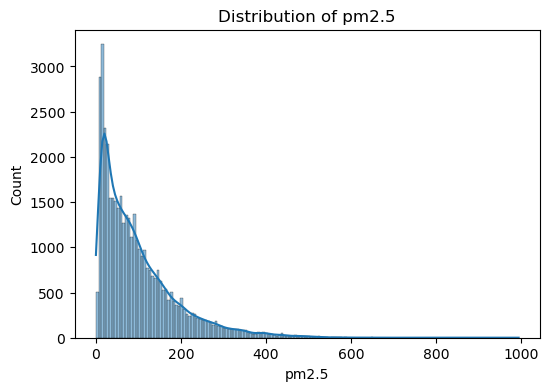

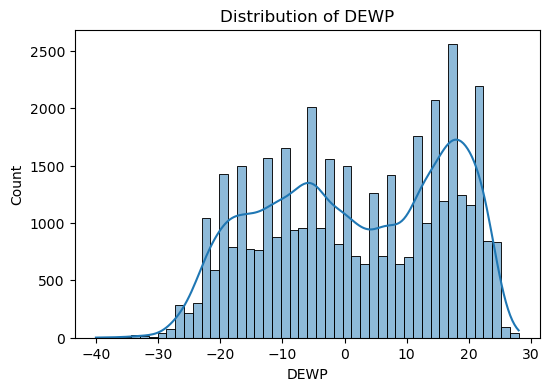

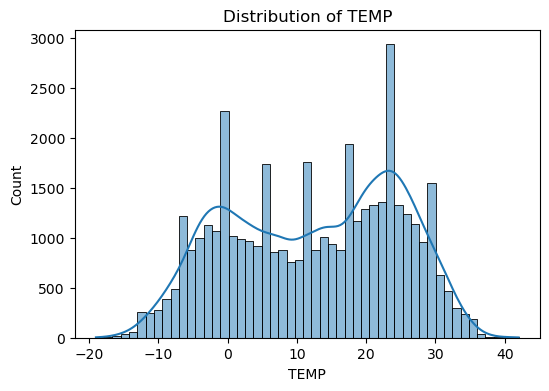

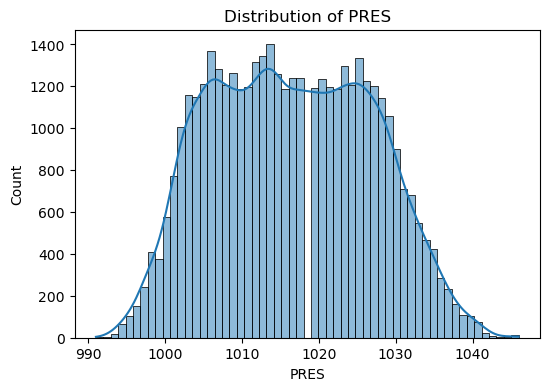

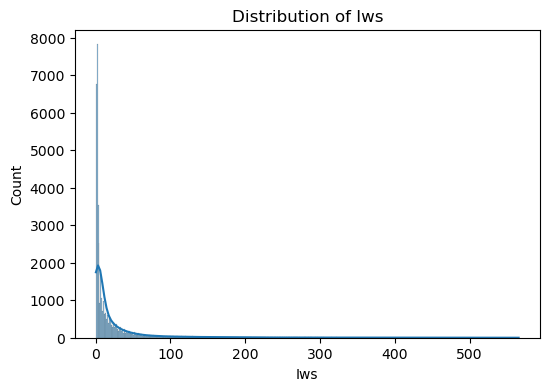

Checking correlations with pm2.5:


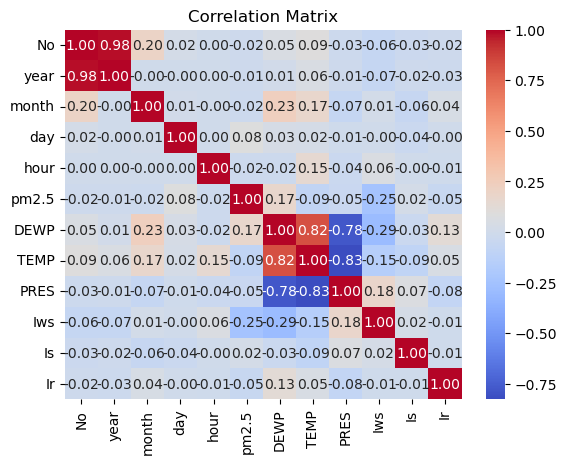

Correlation with pm2.5 (target):
 pm2.5    1.000000
DEWP     0.171423
day      0.082788
Is       0.019266
year    -0.014690
No      -0.017706
hour    -0.023116
month   -0.024069
PRES    -0.047282
Ir      -0.051369
TEMP    -0.090534
Iws     -0.247784
Name: pm2.5, dtype: float64
Random Forest Training MSE: 0.04693733116198871
Random Forest Validation MSE: 1.1527902777777768
Random Forest Test MSE: 0.6669782407407417
Ridge Regression Training MSE: 0.15124994408256184
Ridge Regression Validation MSE: 0.16694970912244458
Ridge Regression Test MSE: 0.15221073835187093


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Load and preprocess your dataset
data = pd.read_csv('Beijing_PM2.5.csv')
data_clean = data.dropna()

# Visualize the distribution of each feature
print("Visualizing the data distribution:")
features = ['pm2.5', 'DEWP', 'TEMP', 'PRES', 'Iws']
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.histplot(data_clean[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

# Correlation Matrix
print("Checking correlations with pm2.5:")

# Drop non-numeric columns like 'cbwd' before calculating the correlation matrix
numeric_data = data_clean.drop(columns=['cbwd'])

# Calculate and visualize the correlation matrix
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Plot the correlation of the features with pm2.5
correlation_with_target = correlation_matrix['pm2.5'].sort_values(ascending=False)
print("Correlation with pm2.5 (target):\n", correlation_with_target)

# Features and label
features = ['pm2.5', 'DEWP', 'TEMP', 'PRES', 'Iws']
X = data_clean[features]
y = data_clean['pm2.5']

# Apply Min-Max Scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.25, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.6, random_state=42)

# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Validation and test predictions
rf_train_pred = rf_model.predict(X_train)
rf_val_pred = rf_model.predict(X_val)
rf_test_pred = rf_model.predict(X_test)

# Mean Squared Error (MSE)
rf_train_mse = mean_squared_error(y_train, rf_train_pred)
rf_val_mse = mean_squared_error(y_val, rf_val_pred)
rf_test_mse = mean_squared_error(y_test, rf_test_pred)

print("Random Forest Training MSE:", rf_train_mse)
print("Random Forest Validation MSE:", rf_val_mse)
print("Random Forest Test MSE:", rf_test_mse)

# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Validation and test predictions
ridge_train_pred = ridge_model.predict(X_train)
ridge_val_pred = ridge_model.predict(X_val)
ridge_test_pred = ridge_model.predict(X_test)

# Mean Squared Error (MSE)
ridge_train_mse = mean_squared_error(y_train, ridge_train_pred)
ridge_val_mse = mean_squared_error(y_val, ridge_val_pred)
ridge_test_mse = mean_squared_error(y_test, ridge_test_pred)

print("Ridge Regression Training MSE:", ridge_train_mse)
print("Ridge Regression Validation MSE:", ridge_val_mse)
print("Ridge Regression Test MSE:", ridge_test_mse)